* **import libraries and dataset**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,MaxPooling2D,Conv2D,GlobalAveragePooling2D,Flatten

from tensorflow.keras.datasets import mnist

In [2]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
x_train.shape,y_train.shape

((60000, 28, 28), (60000,))

* **Visualize the first 6 images**

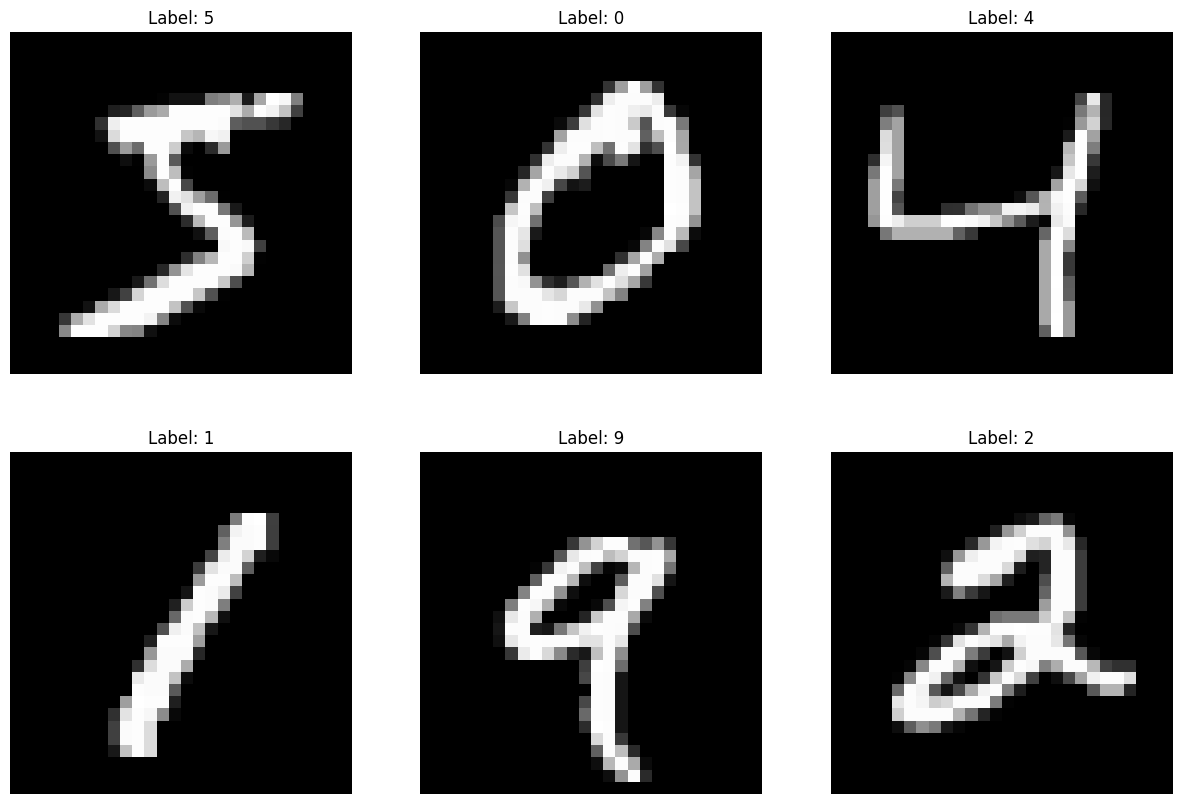

In [4]:

f, ax = plt.subplots(2, 3, figsize=(15, 10))  # 2 rows, 3 columns

for i in range(2):      # rows
    for j in range(3):  # columns
        index = i * 3 + j  # Get the image index (0 to 5)
        ax[i][j].imshow(x_train[index], cmap="gray")
        ax[i][j].set_title(f"Label: {y_train[index]}")
        ax[i][j].axis('off')  # Hide axes for cleaner look

plt.show()




* **View an image in more detail**

In [5]:
def visualize_input(img,ax):
  ax.imshow(img,cmap="gray")
  width,height = img.shape # Reverted hight back to height as it was not the original error
  thresh = img.max()/2.5
  for x in range(width):
    for y in range(height):
      ax.annotate(str(round(img[x][y],2)),xy=(y,x),
                  horizontalalignment = 'center',
                  verticalalignment = 'center', # Corrected typo from verticalalignent to verticalalignment
                  color='white' if img[x][y] < thresh else 'black')

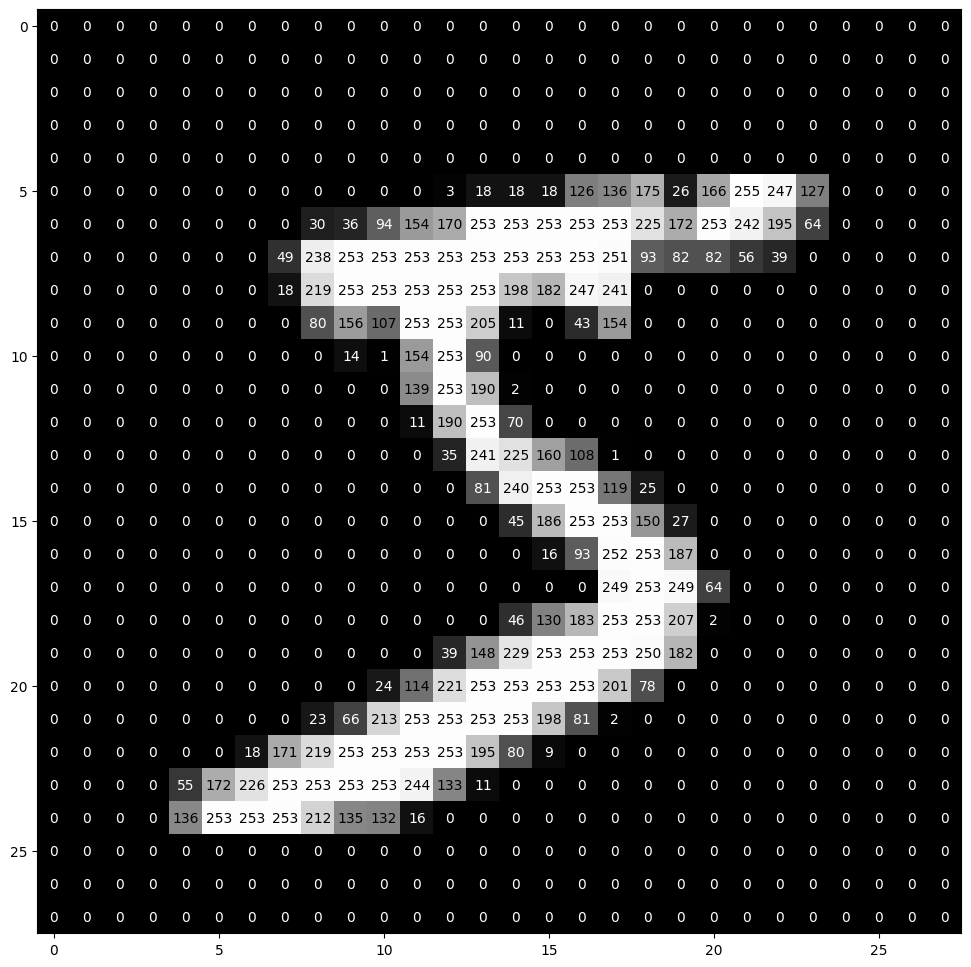

In [6]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
visualize_input(x_train[0],ax)
plt.show() # Added plt.show() to display the plot

* **Rescale the data**

In [7]:
#Convert range(0,255) --> (0,1)
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

* **Preprocess the labels: encode categorical integer labels using one - hot**

In [8]:
num_class = 10
print("Integer - valued labels ")
print(y_train[:10])

#One hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train,num_class)
y_test = tf.keras.utils.to_categorical(y_test,num_class)

print("One hot labels")
print(y_train[:10])

Integer - valued labels 
[5 0 4 1 9 2 1 3 1 4]
One hot labels
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


* **Reshape data to fit our CNN**

In [9]:
img_row = 28
img_col = 28
x_train = x_train.reshape(x_train.shape[0],img_row,img_col,1)  #6000,28,28,1(Single channel)
x_test = x_test.reshape(x_test.shape[0],img_row,img_col,1)

In [10]:
x_train.shape

(60000, 28, 28, 1)

* **Define the model structure**

In [11]:
model = Sequential([
    Conv2D(filters=32,kernel_size=(3,3),padding='same',activation="relu",input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(filters=64,kernel_size=(3,3),padding="same",activation="relu"),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),
    Dense(64,activation="relu"),
    Dense(10,activation="softmax")  #Output Layer
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       200,768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 220,234 (860.29 KB)

 Trainable params: 220,234 (860.29 KB)

 Non-trainable params: 0 (0.00 B)

* **Compile the Model**

In [14]:
model.compile(loss="categorical_crossentropy",optimizer="rmsprop",metrics=["accuracy"])

* **Train the model**

In [16]:
model.fit(x_train,y_train,batch_size=64,epochs=5,validation_split=0.1)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 66s 78ms/step - accuracy: 0.9773 - loss: 0.0713 - val_accuracy: 0.9877 - val_loss: 0.0410
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 80s 76ms/step - accuracy: 0.9878 - loss: 0.0413 - val_accuracy: 0.9910 - val_loss: 0.0329
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 67s 79ms/step - accuracy: 0.9915 - loss: 0.0274 - val_accuracy: 0.9903 - val_loss: 0.0379
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 66s 78ms/step - accuracy: 0.9935 - loss: 0.0204 - val_accuracy: 0.9880 - val_loss: 0.0468
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 82s 78ms/step - accuracy: 0.9947 - loss: 0.0181 - val_accuracy: 0.9905 - val_loss: 0.0365


* **Predict**

In [19]:
pred = model.predict(x_test[12].reshape(1, 28, 28, 1)) # Reshape to add batch dimension
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


array([[1.3004993e-13, 1.8260894e-12, 3.3396816e-12, 8.4634081e-08,
        6.2478779e-05, 2.4686736e-08, 2.2677371e-13, 1.4675787e-06,
        2.2730453e-06, 9.9993372e-01]], dtype=float32)

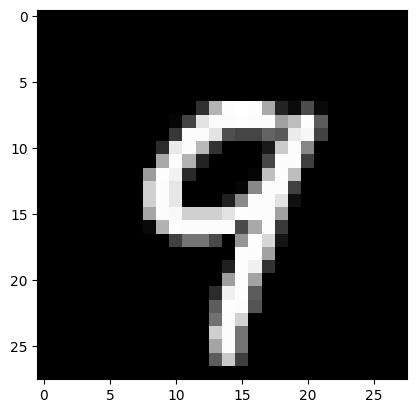

Predicted value: 9


In [27]:
plt.imshow(x_test[12],cmap="grey")
plt.show()
print(f"Predicted value: {np.argmax(pred).astype(dtype=np.int64)}")